##Bibliotecas

In [ ]:
%%capture
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!pip install -U aeon --quiet

from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifierCV
from sklearn.feature_selection import mutual_info_classif

from aeon.datasets import load_arrow_head
from aeon.transformations.collection.convolution_based._rocket import Rocket
from aeon.transformations.collection.convolution_based._rocket import *

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

##Treinamento e teste

In [ ]:
#carrega os dados de treinamento e teste
x_train, y_train = load_arrow_head(split = "train")
x_test, y_test = load_arrow_head(split = "test")

rocket = Rocket(num_kernels=1000)
rocket.fit(x_train) #ajusta o transformador com dados de treinamento

# aplicam os kernels ajustados para transformar os dados de treinamento e teste
x_train_transform = rocket.transform(x_train)
x_test_transform = rocket.transform(x_test)

# Fit classificador
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
classifier.fit(x_train_transform, y_train)

y_pred = classifier.predict(x_test_transform)
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7942857142857143


In [ ]:
x_train.shape

(36, 1, 251)

In [ ]:
x_train_transform.shape

(36, 2000)

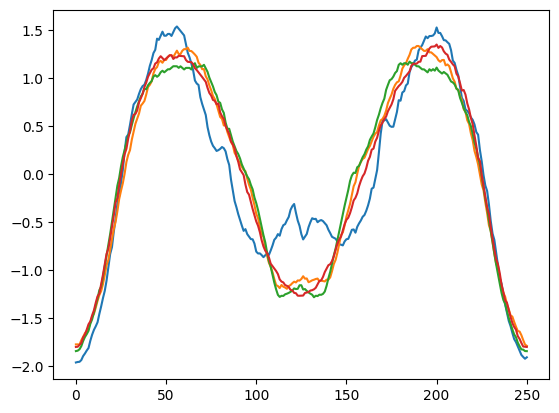

In [ ]:
arrow, arrow_labels = load_arrow_head(split="train")
plt.plot(arrow[0][0])
plt.plot(arrow[1][0])
plt.plot(arrow[10][0])
plt.plot(arrow[35][0])

##Features

In [ ]:
ppv_features = pd.DataFrame(x_train_transform[:,::2]) #pares
max_features = pd.DataFrame(x_train_transform[:,1::2]) #impares

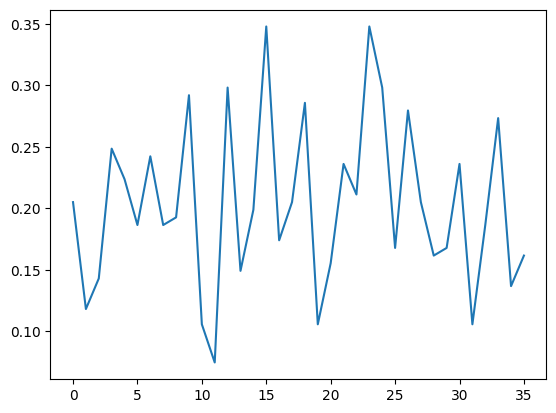

In [ ]:
plt.plot(ppv_features[0])

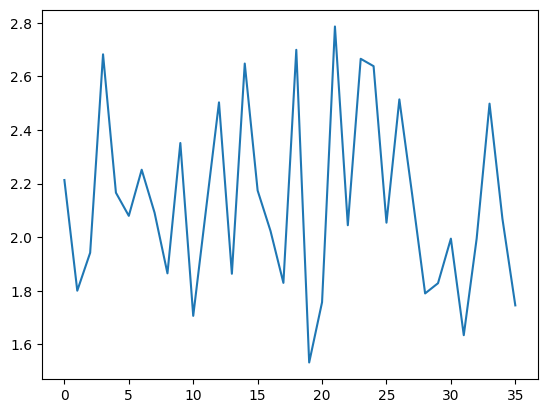

In [ ]:
plt.plot(max_features[36])

In [ ]:
ppv_features #nunca terá valores maiores que 1

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.204969,0.503497,0.372294,0.414343,0.569721,0.649351,0.262948,0.402597,0.480519,0.318725,...,0.779006,0.418327,0.580110,0.625514,0.023904,1.000000,0.286853,0.336898,0.462151,0.365297
1,0.118012,0.496504,0.367965,0.414343,0.597610,0.610390,0.286853,0.389610,0.506494,0.326693,...,0.646409,0.541833,0.552486,0.637860,0.023904,1.000000,0.306773,0.358289,0.458167,0.433790
2,0.142857,0.489510,0.359307,0.438247,0.585657,0.623377,0.262948,0.385281,0.506494,0.342629,...,0.696133,0.482072,0.541436,0.650206,0.023904,1.000000,0.270916,0.326203,0.474104,0.452055
3,0.248447,0.468531,0.389610,0.438247,0.549801,0.597403,0.346614,0.424242,0.480519,0.366534,...,0.740331,0.505976,0.629834,0.572016,0.023904,1.000000,0.334661,0.342246,0.470120,0.470320
4,0.223602,0.489510,0.385281,0.402390,0.577689,0.571429,0.294821,0.398268,0.489177,0.366534,...,0.685083,0.541833,0.563536,0.617284,0.023904,1.000000,0.314741,0.331551,0.498008,0.442922
5,0.186335,0.482517,0.294372,0.470120,0.665339,0.623377,0.302789,0.333333,0.484848,0.278884,...,0.729282,0.517928,0.535912,0.646091,0.023904,1.000000,0.274900,0.331551,0.494024,0.452055
6,0.242236,0.510490,0.372294,0.486056,0.613546,0.623377,0.374502,0.419913,0.497835,0.390438,...,0.712707,0.525896,0.464088,0.576132,0.023904,1.000000,0.366534,0.331551,0.482072,0.497717
7,0.186335,0.454545,0.411255,0.402390,0.569721,0.519481,0.330677,0.432900,0.502164,0.354582,...,0.745856,0.565737,0.546961,0.609053,0.023904,1.000000,0.314741,0.385027,0.490040,0.433790
8,0.192547,0.496504,0.367965,0.434263,0.597610,0.623377,0.278884,0.398268,0.493506,0.330677,...,0.674033,0.521912,0.535912,0.633745,0.023904,1.000000,0.278884,0.363636,0.474104,0.447489
9,0.291925,0.468531,0.406926,0.478088,0.573705,0.636364,0.314741,0.411255,0.489177,0.382470,...,0.668508,0.521912,0.558011,0.584362,0.023904,0.878049,0.346614,0.352941,0.498008,0.465753


#Heatmap PPV

<function matplotlib.pyplot.show(close=None, block=None)>

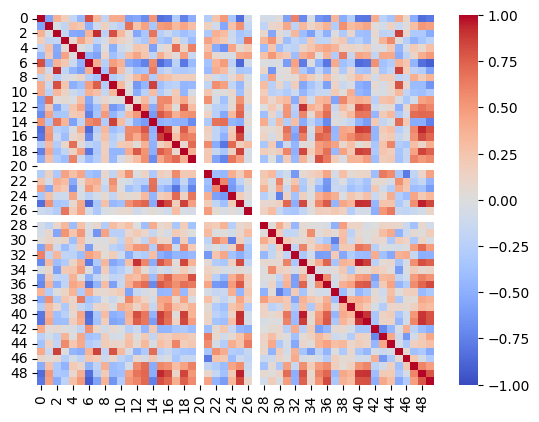

In [ ]:
correlation_matrix = np.corrcoef(x_train_transform[:,0:100:2].T)#pares
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.show

#Heatmap MAX

<function matplotlib.pyplot.show(close=None, block=None)>

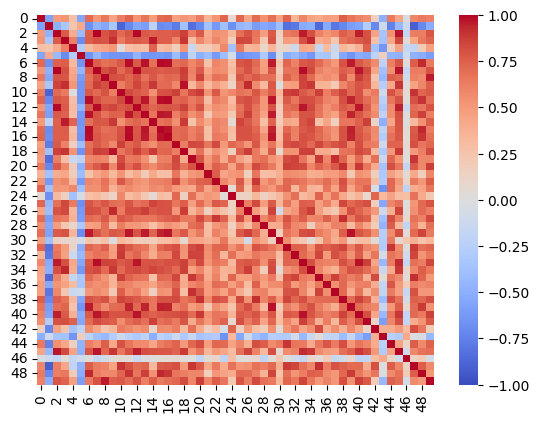

In [ ]:
correlation_matrix = np.corrcoef(x_train_transform[:,1:100:2].T)#ímpares
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.show

#Kernels mais **importantes**

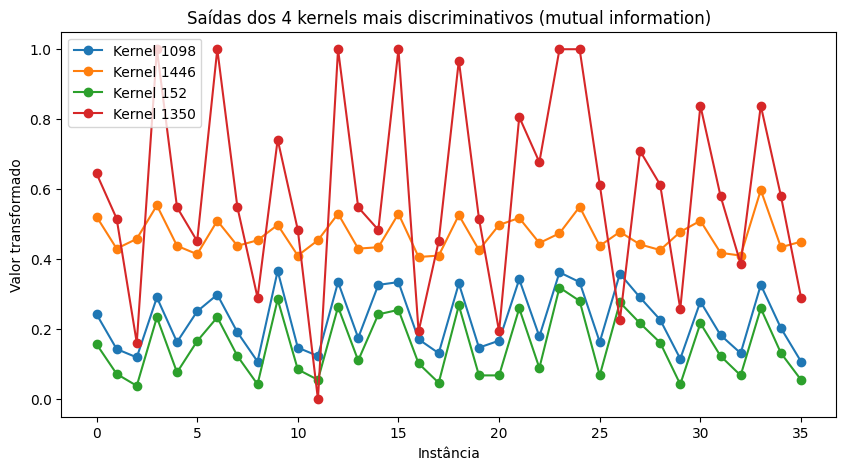

In [ ]:
# Carrega os dados de treinamento e teste
x_train, y_train = load_arrow_head(split="train")
x_test, y_test = load_arrow_head(split="test")

# Inicializa o Rocket com 1000 kernels e ajusta ao conjunto de treinamento
trf = Rocket(num_kernels=1000, random_state=42)
trf.fit(x_train)

# Transforma os dados de treinamento
X_train = trf.transform(x_train)

# Encontra os kernels mais discriminativos com mutual information
n_kernels = 4  # número de kernels mais importantes que queremos visualizar
mutual_info = mutual_info_classif(X_train, y_train, random_state=42)

# Seleciona os índices dos kernels com as maiores pontuações de mutual information
indices = np.argsort(mutual_info)[-n_kernels:]

# Visualiza as saídas dos kernels mais discriminativos
plt.figure(figsize=(10, 5))
for idx in indices:
    plt.plot(X_train[:, idx], 'o-', label=f'Kernel {idx}')
plt.legend(loc='best')
plt.title(f'Saídas dos {n_kernels} kernels mais discriminativos (mutual information)')
plt.xlabel('Instância')
plt.ylabel('Valor transformado')
plt.show()